# Draw directed graph from a given vertex

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx

from collections import deque

In [13]:
class Vertex:
    def __init__(self, name):
        self.name = name
        self.children = []
        self.parents = []
    
    def __repr__(self):
        return f"Vertex('{self.name}')"

In [14]:
def connect_parent_to_child(parent, child):
    parent.children.append(child)
    child.parents.append(parent)

In [19]:
def draw_data_graph_from_vertex(vertex):
    """Draw the data graph given a single vertex within the graph."""
    
    G = nx.DiGraph()
    explored = set()
    
    q = deque()
    q.append(vertex)
    
    def add_directed_edge(source, destination):
        """Add a directed edge to the graph."""
        
        src_label = source.name
        dst_label = destination.name
        G.add_edge(src_label, dst_label)
        
    # 1st pass -- find all vertices
    all_vertices = []
    
    while len(q) > 0:
        
        # Take a vertex off the queue
        vertex = q.popleft()
        all_vertices.append(vertex)
        
        # Record that the vertex has been explored
        explored.add(vertex)
        
        for p in vertex.parents:
            if not p in explored:
                explored.add(p)
                q.append(p)
        
        for c in vertex.children:
            if not c in explored:
                explored.add(c)
                q.append(c)          
    
    # 2nd pass -- add parent to child edges
    for v in all_vertices:
        
        for c in v.children:
            add_directed_edge(v, c)
    
    # Draw the graph
    nx.draw(G, with_labels=True, font_weight='bold')

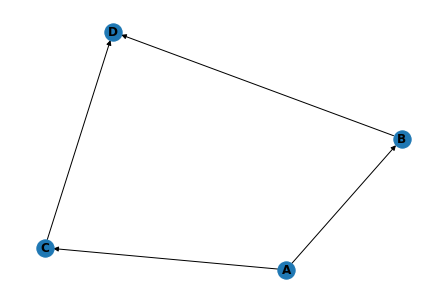

In [20]:
a = Vertex("A")
b = Vertex("B")
c = Vertex("C")
d = Vertex("D")

connect_parent_to_child(a,b)
connect_parent_to_child(a,c)
connect_parent_to_child(b,d)
connect_parent_to_child(c,d)

draw_data_graph_from_vertex(a)

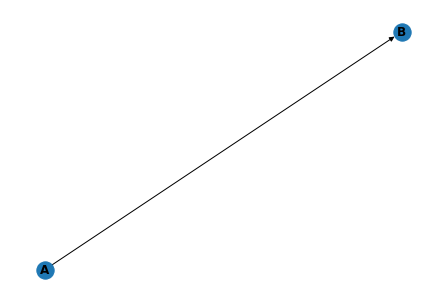

In [21]:
# A ---> B
a = Vertex("A")
b = Vertex("B")
connect_parent_to_child(a,b)
draw_data_graph_from_vertex(a)